In [1]:
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.patches as patches

## Logs utils

#### Train logs utils

In [2]:
# Converts the smoothed values to a dictionnary of each values
def smoothed_value_to_str(smoothed_value):
    d_values = {}
    d_values['median'] = smoothed_value.median
    d_values['avg'] = smoothed_value.avg
    d_values['global_avg'] = smoothed_value.global_avg
    d_values['max'] = smoothed_value.max
    d_values['value'] = smoothed_value.value
    return d_values


# Converts the train logs from MetricLogger to list
def train_logs_to_lst(logs):
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].meters.keys():
            d[key] = smoothed_value_to_str(logs[i].meters[key])
        lst.append(d)
    return lst


# Puts the training logs into a json file with time dependent file name
def train_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    train_metric_logs = train_logs_to_lst(logs)
    filename = ftime + "_train_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(train_metric_logs, f, ensure_ascii=False, indent=4)


# Converts the train logs from MetricLogger to list
def train_logs_to_lst(logs):
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].meters.keys():
            d[key] = smoothed_value_to_str(logs[i].meters[key])
        lst.append(d)
    return lst


# Puts the training logs into a json file with time dependent file name
def train_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    train_metric_logs = train_logs_to_lst(logs)
    filename = ftime + "_train_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(train_metric_logs, f, ensure_ascii=False, indent=4)

#### Valid logs utils

In [3]:
# Merge the dicts of a list 
def merge_dict(logs):
    logs_better = []
    try:
        for i in range(len(logs)):
            logs_better.append({**logs[i][0], **logs[i][1], **logs[i][2], **logs[i][3]})
        return logs_better
    except:
        print(logs[0])
        logs_better = logs
        return logs_better

    
# Converts the valid logs from list of dictionnaries to string
def valid_logs_to_lst(valid_logs):
    if type(valid_logs) == list:
        return valid_logs
    logs = merge_dict(valid_logs)
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].keys():
            d[key] = logs[i][key].cpu().numpy().tolist()
        lst.append(d)
    return lst


# Puts the cis validation logs into a json file with time dependent file name
def cis_valid_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    valid_metric_logs = valid_logs_to_lst(logs)
    filename = ftime + "_cis_valid_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(valid_metric_logs, f, ensure_ascii=False, indent=4)


# Puts the trans validation logs into a json file with time dependent file name
def trans_valid_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    valid_metric_logs = valid_logs_to_lst(logs)
    filename = ftime + "_trans_valid_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(valid_metric_logs, f, ensure_ascii=False, indent=4)

In [4]:
## Logs utils

#### Train logs utils

# Converts the smoothed values to a dictionnary of each values
def smoothed_value_to_str(smoothed_value):
    d_values = {}
    d_values['median'] = smoothed_value.median
    d_values['avg'] = smoothed_value.avg
    d_values['global_avg'] = smoothed_value.global_avg
    d_values['max'] = smoothed_value.max
    d_values['value'] = smoothed_value.value
    return d_values


# Converts the train logs from MetricLogger to list
def train_logs_to_lst(logs):
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].meters.keys():
            d[key] = smoothed_value_to_str(logs[i].meters[key])
        lst.append(d)
    return lst


# Puts the training logs into a json file with time dependent file name
def train_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    train_metric_logs = train_logs_to_lst(logs)
    filename = ftime + "_train_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(train_metric_logs, f, ensure_ascii=False, indent=4)


# Converts the train logs from MetricLogger to list
def train_logs_to_lst(logs):
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].meters.keys():
            d[key] = smoothed_value_to_str(logs[i].meters[key])
        lst.append(d)
    return lst


# Puts the training logs into a json file with time dependent file name
def train_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    train_metric_logs = train_logs_to_lst(logs)
    filename = ftime + "_train_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(train_metric_logs, f, ensure_ascii=False, indent=4)

#### Valid logs utils

# Merge the dicts of a list 
def merge_dict(logs):
    logs_better = []
    try:
        for i in range(len(logs)):
            logs_better.append({**logs[i][0], **logs[i][1], **logs[i][2], **logs[i][3]})
        return logs_better
    except:
        print(logs[0])
        logs_better = logs
        return logs_better

    
# Converts the valid logs from list of dictionnaries to string
def valid_logs_to_lst(valid_logs):
    if type(valid_logs) == list:
        return valid_logs
    logs = merge_dict(valid_logs)
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].keys():
            d[key] = logs[i][key].cpu().numpy().tolist()
        lst.append(d)
    return lst


# Puts the cis validation logs into a json file with time dependent file name
def cis_valid_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    valid_metric_logs = valid_logs_to_lst(logs)
    filename = ftime + "_cis_valid_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(valid_metric_logs, f, ensure_ascii=False, indent=4)


# Puts the trans validation logs into a json file with time dependent file name
def trans_valid_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    valid_metric_logs = valid_logs_to_lst(logs)
    filename = ftime + "_trans_valid_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(valid_metric_logs, f, ensure_ascii=False, indent=4)

## Looking at/Loading the logs in convenient ways
Here we define the variables "train_logs", "cis_valid_logs" and "trans_valid_logs" that will be used in the methods for the results and the visualisations.

We can import logs or use the ones from training.

### Load logs right here

In [6]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '10_rpn_roi_4' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_logs = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_valid_logs = json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_valid_logs = json.load(f)

### Combine with some other logs right here

In [ ]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '75_rpn_roi_1' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_logs = train_logs + json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_valid_logs = cis_valid_logs + json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_valid_logs = trans_valid_logs + json.load(f)

## Results

In [7]:
# To confirm that the data is loaded properly
n = len(train_logs)
print(n)

10


In [8]:
# Train loss to print (here we use global_avg but we can use: value, median, avg, max or global_avg)
results_train_loss = []

for i in range(n):
    results_train_loss.append(train_logs[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss = [] # cis

for i in range(n):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_valid_logs[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss = [] # trans

for i in range(n):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_valid_logs[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss.append(loss_interm)

### Plots

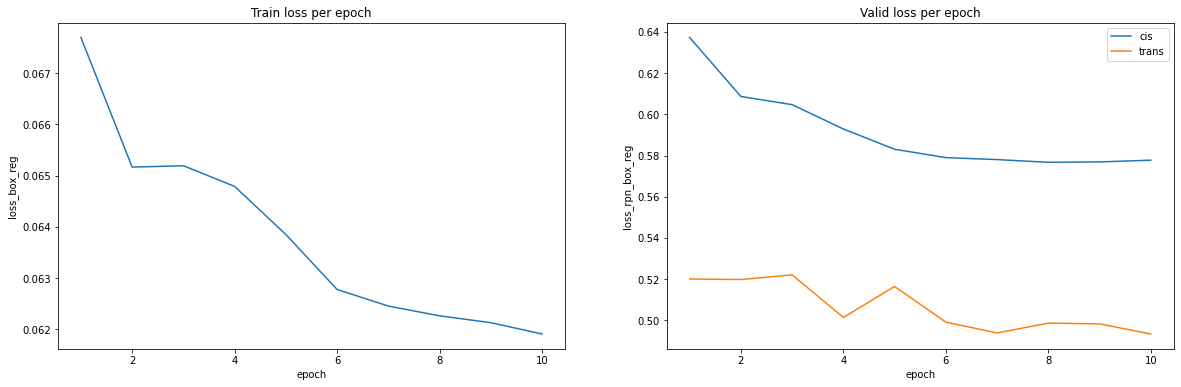

In [9]:
# Printing the different plots
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(np.arange(1, n + 1), results_train_loss, label='train')
ax[0].set_title('Train loss per epoch')
ax[0].set_ylabel('loss_box_reg')
ax[0].set_xlabel('epoch')

plt.title('Train loss per epoch')
ax[1].plot(np.arange(1, n + 1), results_cis_valid_loss, label='cis')
ax[1].plot(np.arange(1, n + 1), results_trans_valid_loss, label='trans')
ax[1].set_title('Valid loss per epoch')
ax[1].set_ylabel('loss_rpn_box_reg')
ax[1].set_xlabel('epoch')
ax[1].legend()

#### Save the figure to pdf format in the figures folder

In [ ]:
fig.savefig("saved_figures/" + time.strftime("%Y%m%d_%H%M%S") + "_figure.pdf")

In [ ]:
fig.savefig("figures/" + time.strftime("%Y%m%d_%H%M%S") + "_figure.pdf")

In [ ]:
fig.savefig("figures/full_75_rpn_roi_1_figure.pdf")

## Table to show results (manually)

In [10]:
# RPN + ROI
cis_results = [0.863, 0.895, 0.897]
trans_results = [0.781, 0.794, 0.785]
delta_results = [cis_results[i]-trans_results[i] for i in range(len(cis_results))]

Text(0.5, 0, 'epoch')

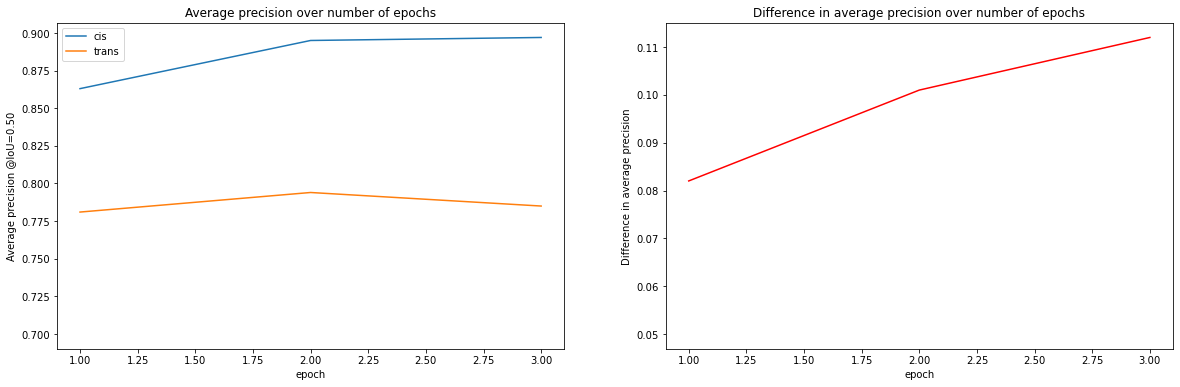

In [11]:
# RPN + ROI: Printing the different plots
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(np.arange(1, len(cis_results) + 1), cis_results, label='cis')
ax[0].plot(np.arange(1, len(trans_results) + 1), trans_results, label='trans')
ax[0].axhline(y=0.7, c="white")
ax[0].set_title('Average precision over number of epochs')
ax[0].set_ylabel('Average precision @IoU=0.50')
ax[0].set_xlabel('epoch')
ax[0].legend()

ax[1].plot(np.arange(1, len(cis_results) + 1), delta_results,'r', label='train')
ax[1].axhline(y=0.05, c="white")
ax[1].set_title('Difference in average precision over number of epochs')
ax[1].set_ylabel('Difference in average precision')
ax[1].set_xlabel('epoch')

In [14]:
# base vs roi vs roi+rpn
cis_results = [0.863, 0.895, 0.897]

# Training

In [12]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

<function matplotlib.pyplot.show(close=None, block=None)>

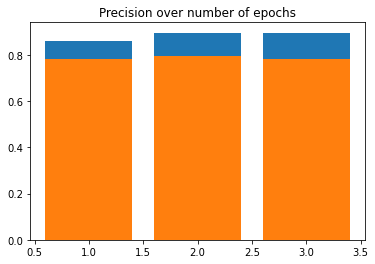

In [13]:
plt.bar(np.arange(1, 3 + 1), cis_results, label='xd')
plt.bar(np.arange(1, 3 + 1), trans_results)
plt.title('Precision over number of epochs')
plt.show

In [15]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_base' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_base = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_base = json.load(f)

# Import trans valid logsw
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_base = json.load(f)

In [16]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_roi_4_vision_version_diff' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_roi = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_roi = json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_roi = json.load(f)

In [17]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_rpn_roi_1' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_rpn_roi = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_rpn_roi = json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_rpn_roi = json.load(f)

In [20]:
num_epochs = len(train_base)

In [21]:
# base
results_train_loss_base = []

for i in range(num_epochs):
    results_train_loss_base.append(train_base[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss_base = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_base[(167 * i) + j]['loss_box_reg']
    results_cis_valid_loss_base.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_base = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_base[(154 * i) + j]['loss_box_reg']
    results_trans_valid_loss_base.append(loss_interm)

In [22]:
# roi
results_train_loss_roi = []

for i in range(num_epochs):
    results_train_loss_roi.append(train_roi[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_roi[(167 * i) + j]['loss_box_reg']
    results_cis_valid_loss_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_roi[(154 * i) + j]['loss_box_reg']
    results_trans_valid_loss_roi.append(loss_interm)

In [23]:
# rpn+roi
results_train_loss_rpn_roi = []

for i in range(num_epochs):
    results_train_loss_rpn_roi.append(train_rpn_roi[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss_rpn_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_rpn_roi[(167 * i) + j]['loss_box_reg']
    results_cis_valid_loss_rpn_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_rpn_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_rpn_roi[(154 * i) + j]['loss_box_reg']
    results_trans_valid_loss_rpn_roi.append(loss_interm)

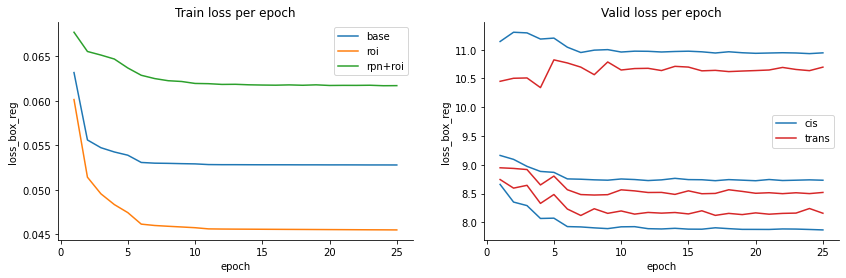

In [24]:
# Printing the different plots
fig, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(np.arange(1, num_epochs + 1), results_train_loss_base, label='base')
ax[0].plot(np.arange(1, num_epochs + 1), results_train_loss_roi, label='roi')
ax[0].plot(np.arange(1, num_epochs + 1), results_train_loss_rpn_roi, label='rpn+roi')
ax[0].set_title('Train loss per epoch')
ax[0].set_ylabel('loss_box_reg')
ax[0].set_xlabel('epoch')
ax[0].legend()

plt.title('Train loss per epoch')
ax[1].plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_base, label='cis', color='tab:blue')
ax[1].plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_base, label='trans', color='tab:red')
ax[1].plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_roi, color='tab:blue')
ax[1].plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_roi, color='tab:red')
ax[1].plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_rpn_roi, color='tab:blue')
ax[1].plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_rpn_roi, color='tab:red')
ax[1].set_title('Valid loss per epoch')
ax[1].set_ylabel('loss_box_reg')
ax[1].set_xlabel('epoch')
ax[1].legend()

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

In [ ]:
fig.savefig("figures/baseline_vs_roi_vs_rpn_roi_training.png", transparent=True)

In [25]:
# Cis valid loss to print
results_cis_valid_loss_base = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_base[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss_base.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_base = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_base[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss_base.append(loss_interm)

In [26]:
# Cis valid loss to print
results_cis_valid_loss_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_roi[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_roi[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss_roi.append(loss_interm)

In [27]:
# Cis valid loss to print
results_cis_valid_loss_rpn_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_rpn_roi[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss_rpn_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_rpn_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_rpn_roi[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss_rpn_roi.append(loss_interm)

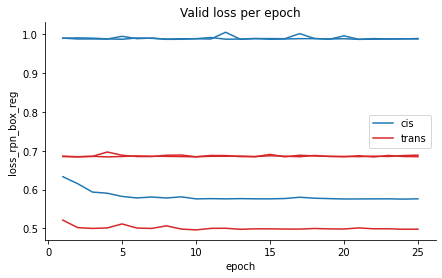

In [28]:
fig, ax = plt.subplots(1,1, figsize=(7,4))

plt.title('Train loss per epoch')
ax.plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_base, label='cis', color='tab:blue')
ax.plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_base, label='trans', color='tab:red')
ax.plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_roi, color='tab:blue')
ax.plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_roi, color='tab:red')
ax.plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_rpn_roi, color='tab:blue')
ax.plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_rpn_roi, color='tab:red')
ax.set_title('Valid loss per epoch')
ax.set_ylabel('loss_rpn_box_reg')
ax.set_xlabel('epoch')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
fig.savefig("saved_figures/baseline_vs_roi_vs_rpn_roi_training_rpn.png", transparent=True)

# Evaluations

### Different depths

TypeError: set_ticks() takes 2 positional arguments but 3 were given

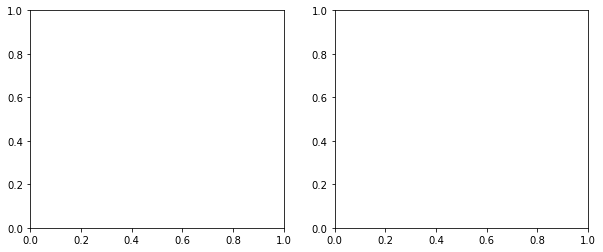

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Create bars
barWidth = 0.55
bars1 = [73.0, 65.3]
bars2 = [52.4, 50.6]

bars3 = [83.6, 76.3]
bars4 = [56.9, 55.6]

bars5 = [86.3, 78.1]
bars6 = [59.1, 57.5]

bars = bars1+bars3+bars5
bars_recall = bars2+bars4+bars6

# The X position of bars
r1 = [1, 1]
r2 = [2, 2]
r3 = [3, 3]
r4 = r1+r2+r3

# Text below each barplot with a rotation at 90°
ax[0].set_xticks([1, 2, 3], ['Baseline', 'ROI', 'RPN+ROI'])
ax[1].set_xticks([1, 2, 3], ['Baseline', 'ROI', 'RPN+ROI'])

# Create barplot 1
ax[0].bar(r1, bars1, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].bar(r2, bars3, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].bar(r3, bars5, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].axis(ymin=40, ymax=100)
ax[0].set_title('Precision at IoU = 0.50', fontsize=13)
for i, v in enumerate(r4):
    if i%2 ==0:
        ax[0].text(v-0.13, bars[i] + 1, str(bars[i]), color='black')
    else:
        ax[0].text(v-0.13, bars[i] - 3, str(bars[i]), color='black')


# Create barplot 2
ax[1].bar(r1, bars2, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].bar(r2, bars4, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].bar(r3, bars6, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].axhline(100, color='white')
ax[1].axis(ymin=40, ymax=70)
ax[1].set_title('Recall (Max det = 100)', fontsize=13)
for i, v in enumerate(r4):
    if i%2 ==0:
        ax[1].text(v-0.13, bars_recall[i] + 0.75, str(bars_recall[i]), color='black')
    else:
        ax[1].text(v-0.13, bars_recall[i] - 1.5, str(bars_recall[i]), color='black')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig("figures/baseline_vs_roi_vs_rpn_roi_precision_recall.png", transparent=True)

plt.show

TypeError: set_ticks() takes 2 positional arguments but 3 were given

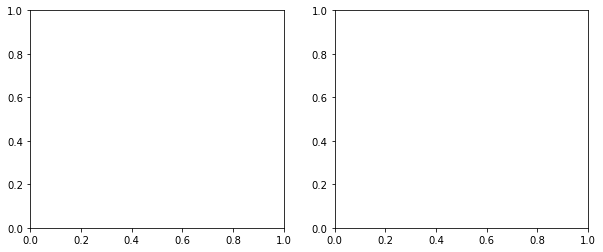

In [35]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Create bars
barWidth = 0.55
diff_bars1 = [round(bars1[0]-bars1[1], 3)]
diff_bars2 = [round(bars2[0]-bars2[1], 3)]

diff_bars3 = [round(bars3[0]-bars3[1], 3)]
diff_bars4 = [round(bars4[0]-bars4[1], 3)]

diff_bars5 = [round(bars5[0]-bars5[1], 3)]
diff_bars6 = [round(bars6[0]-bars6[1], 3)]

diff_bars = diff_bars1+diff_bars3+diff_bars5
diff_bars_recall = diff_bars2+diff_bars4+diff_bars6

# The X position of bars
r1 = [1]
r2 = [2]
r3 = [3]
r4 = r1+r2+r3

# Text below each barplot with a rotation at 90°
ax[0].set_xticks([1, 2, 3], ['Baseline', 'ROI', 'RPN+ROI'])
ax[1].set_xticks([1, 2, 3], ['Baseline', 'ROI', 'RPN+ROI'])

# Create barplot 1
ax[0].bar(r1, diff_bars1, width = barWidth, color = ('tab:orange'))
ax[0].bar(r2, diff_bars3, width = barWidth, color = ('tab:orange'))
ax[0].bar(r3, diff_bars5, width = barWidth, color = ('tab:orange'))
ax[0].axis(ymin=0, ymax=10)
ax[0].set_title('Diff. between Cis and Trans - Precision', fontsize=13)
for i, v in enumerate(r4):
    ax[0].text(v-0.13, diff_bars[i] + 0.25, str(diff_bars[i]), color='black')


# Create barplot 2
ax[1].bar(r1, diff_bars2, width = barWidth, color = ('tab:orange'))
ax[1].bar(r2, diff_bars4, width = barWidth, color = ('tab:orange'))
ax[1].bar(r3, diff_bars6, width = barWidth, color = ('tab:orange'))
ax[1].axhline(100, color='white')
ax[1].axis(ymin=0, ymax=5)
ax[1].set_title('Diff. between Cis and Trans - Recall', fontsize=13)
for i, v in enumerate(r4):
    ax[1].text(v-0.13, diff_bars_recall[i] + 0.15, str(diff_bars_recall[i]), color='black')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig("figures/baseline_vs_roi_vs_rpn_roi_diff.png", transparent=True)

plt.show

### Number of epochs

TypeError: set_ticks() takes 2 positional arguments but 3 were given

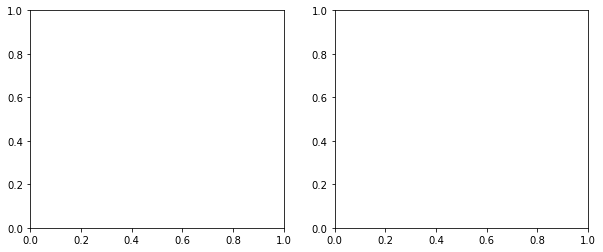

In [33]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Create bars
barWidth = 0.55

bars00 = [85.4, 77.3]
bars0 = [58.4, 57.1]

bars1 = [86.3, 78.1]
bars2 = [59.1, 57.5]

bars3 = [89.5, 79.4]
bars4 = [60.3, 57.7]

bars5 = [89.7, 78.5]
bars6 = [59.4, 56.2]

bars = bars00+bars1+bars3+bars5
bars_recall = bars0+bars2+bars4+bars6

# The X position of bars
r0 = [1, 1]
r1 = [2, 2]
r2 = [3, 3]
r3 = [4, 4]
r4 = r0+r1+r2+r3

# Text below each barplot
ax[0].set_xticks([1, 2, 3, 4], ['10', '25', '50', '75'])
ax[1].set_xticks([1, 2, 3, 4], ['10', '25', '50', '75'])

# Create barplot 1
ax[0].bar(r0, bars00, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].bar(r1, bars1, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].bar(r2, bars3, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].bar(r3, bars5, width = barWidth, color = ('tab:blue','tab:red'))
ax[0].axis(ymin=40, ymax=100)
ax[0].set_title('Precision over epochs', fontsize=13)
for i, v in enumerate(r4):
    if i%2 ==0:
        ax[0].text(v-0.13, bars[i] + 1, str(bars[i]), color='black')
    else:
        ax[0].text(v-0.13, bars[i] - 3, str(bars[i]), color='black')


# Create barplot 2
ax[1].bar(r0, bars0, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].bar(r1, bars2, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].bar(r2, bars4, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].bar(r3, bars6, width = barWidth, color = ('tab:blue','tab:red'))
ax[1].axhline(100, color='white')
ax[1].axis(ymin=40, ymax=70)
ax[1].set_title('Recall over epochs', fontsize=13)
for i, v in enumerate(r4):
    if i%2 ==0:
        ax[1].text(v-0.13, bars_recall[i] + 1, str(bars_recall[i]), color='black')
    else:
        ax[1].text(v-0.13, bars_recall[i] - 2, str(bars_recall[i]), color='black')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig("figures/rpn_roi_epochs_precision_recall.png", transparent=True)

plt.show

TypeError: set_ticks() takes 2 positional arguments but 3 were given

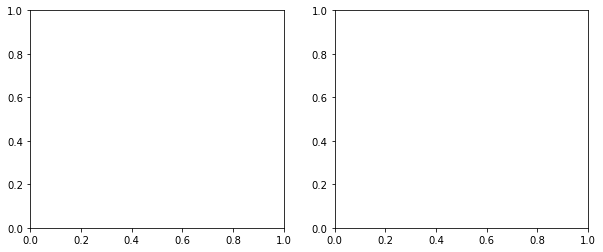

In [32]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

# Create bars
barWidth = 0.55

diff_bars00 = [round(bars00[0]-bars00[1], 3)]
diff_bars0 = [round(bars0[0]-bars0[1], 3)]

diff_bars1 = [round(bars1[0]-bars1[1], 3)]
diff_bars2 = [round(bars2[0]-bars2[1], 3)]

diff_bars3 = [round(bars3[0]-bars3[1], 3)]
diff_bars4 = [round(bars4[0]-bars4[1], 3)]

diff_bars5 = [round(bars5[0]-bars5[1], 3)]
diff_bars6 = [round(bars6[0]-bars6[1], 3)]

diff_bars = diff_bars00+diff_bars1+diff_bars3+diff_bars5
diff_bars_recall = diff_bars0+diff_bars2+diff_bars4+diff_bars6

# The X position of bars
r0 = [1]
r1 = [2]
r2 = [3]
r3 = [4]
r4 = r0+r1+r2+r3

# Text below each barplot with a rotation at 90°
ax[0].set_xticks([1, 2, 3, 4], ['10', '25', '50', '75'])
ax[1].set_xticks([1, 2, 3, 4], ['10', '25', '50', '75'])

# Create barplot 1
ax[0].bar(r0, diff_bars00, width = barWidth, color = ('tab:orange'))
ax[0].bar(r1, diff_bars1, width = barWidth, color = ('tab:orange'))
ax[0].bar(r2, diff_bars3, width = barWidth, color = ('tab:orange'))
ax[0].bar(r3, diff_bars5, width = barWidth, color = ('tab:orange'))
ax[0].axis(ymin=0, ymax=14)
ax[0].set_title('Diff. between Cis and Trans - Precision', fontsize=13)
for i, v in enumerate(r4):
    ax[0].text(v-0.13, diff_bars[i] + 0.25, str(diff_bars[i]), color='black')


# Create barplot 2
ax[1].bar(r0, diff_bars0, width = barWidth, color = ('tab:orange'))
ax[1].bar(r1, diff_bars2, width = barWidth, color = ('tab:orange'))
ax[1].bar(r2, diff_bars4, width = barWidth, color = ('tab:orange'))
ax[1].bar(r3, diff_bars6, width = barWidth, color = ('tab:orange'))
ax[1].axis(ymin=0, ymax=5)
ax[1].set_title('Diff. between Cis and Trans - Recall', fontsize=13)
for i, v in enumerate(r4):
    ax[1].text(v-0.13, diff_bars_recall[i] + 0.15, str(diff_bars_recall[i]), color='black')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show

In [ ]:
fig.savefig("figures/rpn_roi_epochs_precision_diff.png", transparent=True)

## Nice plots for multiple models